# Importando Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')
dados.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


# Análise Exploratoria

## Exploração Inicial

In [3]:
dados.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [4]:
dados.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

## Qual Faxa Etária Média dos Pacientes com doença Cardiaca

In [5]:
idade_média = dados.query('target == 1')['age'].mean()
print(f'A idade média dos pacientes com doença cardiaca é {idade_média:.2f} anos')

A idade média dos pacientes com doença cardiaca é 49.37 anos


## Distribuição de Genêros e presença de doença Cardiaca

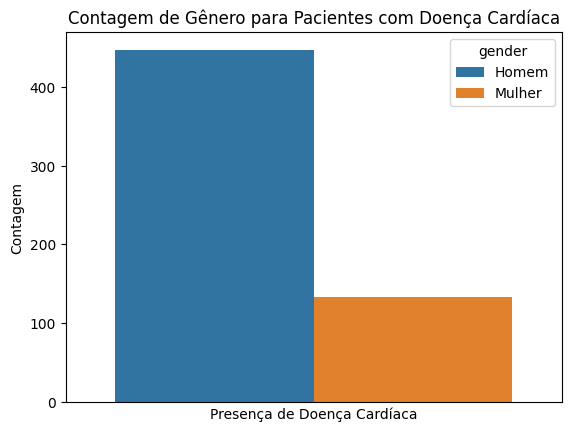

In [6]:
dados_target_1 = dados[dados['target'] == 1]
dados_target_1.loc[dados_target_1['gender'] == 0, 'gender'] = 'Mulher'
dados_target_1.loc[dados_target_1['gender'] == 1, 'gender'] = 'Homem'

ax = sns.countplot(x='target', hue='gender', data=dados_target_1)

plt.xlabel('Presença de Doença Cardíaca')
plt.ylabel('Contagem')
plt.title('Contagem de Gênero para Pacientes com Doença Cardíaca')
ax.set_xticks([])
plt.show()



## Contagem de doença Cardiaca





In [7]:
dados_chestpain = dados.copy()
dados_chestpain['chestpain'] = dados['chestpain'].map({0: 'typical angina', 1: "atypical angina" , 2: "non-anginal pain", 3: "asymptomatic"})

[]

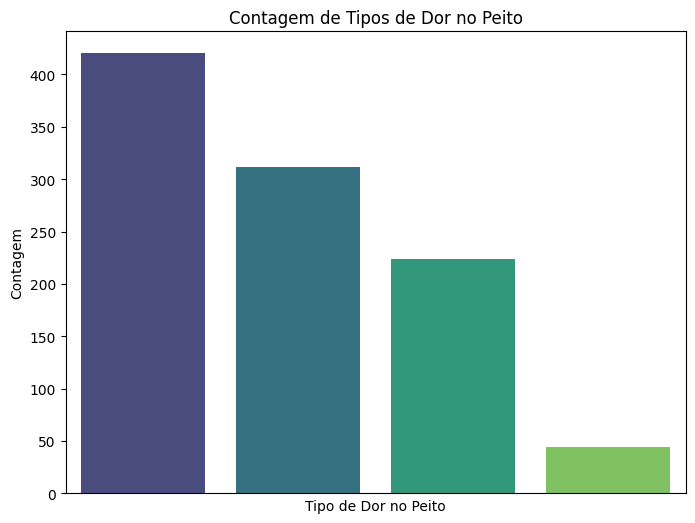

In [8]:
contagem_chestpain = dados_chestpain['chestpain'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=contagem_chestpain.index, y=contagem_chestpain.values, palette='viridis')

plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Contagem')
plt.title('Contagem de Tipos de Dor no Peito')
ax.set_xticks([])


## Quantidade de Pacientes pré diabéticos

Fasting blood sugar é uma váriavel binária que se for 1 indica que o valor de glicose no sangue é superior a 120 mg/dl ou seja é um paciente pré diabético

In [9]:
pré_diabeticos = dados['fastingbloodsugar'].sum()
print(f'O Total de pacientes pré diabéticos é de: {pré_diabeticos} pacientes')

O Total de pacientes pré diabéticos é de: 296 pacientes


## Resultados dos testes de eletrocardiograma

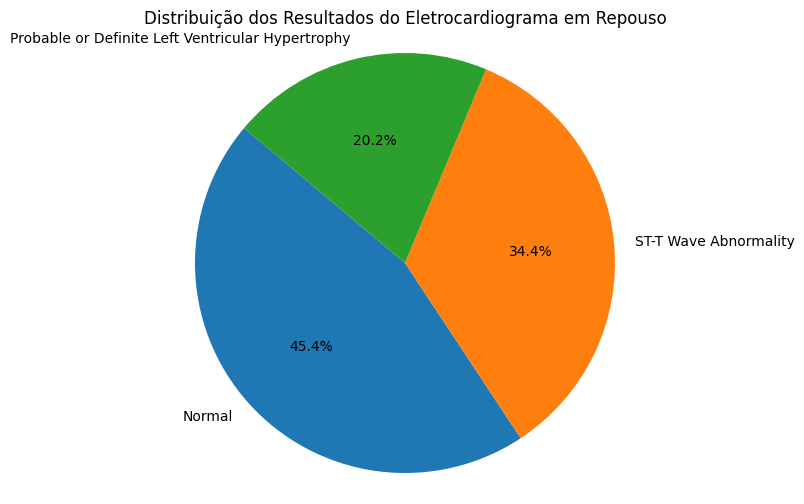

In [10]:
contagem_restingrelectro = dados['restingrelectro'].value_counts()

labels = {
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Probable or Definite Left Ventricular Hypertrophy'
}

contagem_restingrelectro.index = contagem_restingrelectro.index.map(labels)

plt.figure(figsize=(8, 6))
plt.pie(contagem_restingrelectro, labels=contagem_restingrelectro.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Resultados do Eletrocardiograma em Repouso')
plt.axis('equal')

plt.show()

## Pacientes que tiveram dor no peito durante exercicios

In [11]:
dados['exerciseangia'].value_counts()

0    502
1    498
Name: exerciseangia, dtype: int64

## Correlação entre as variáveis

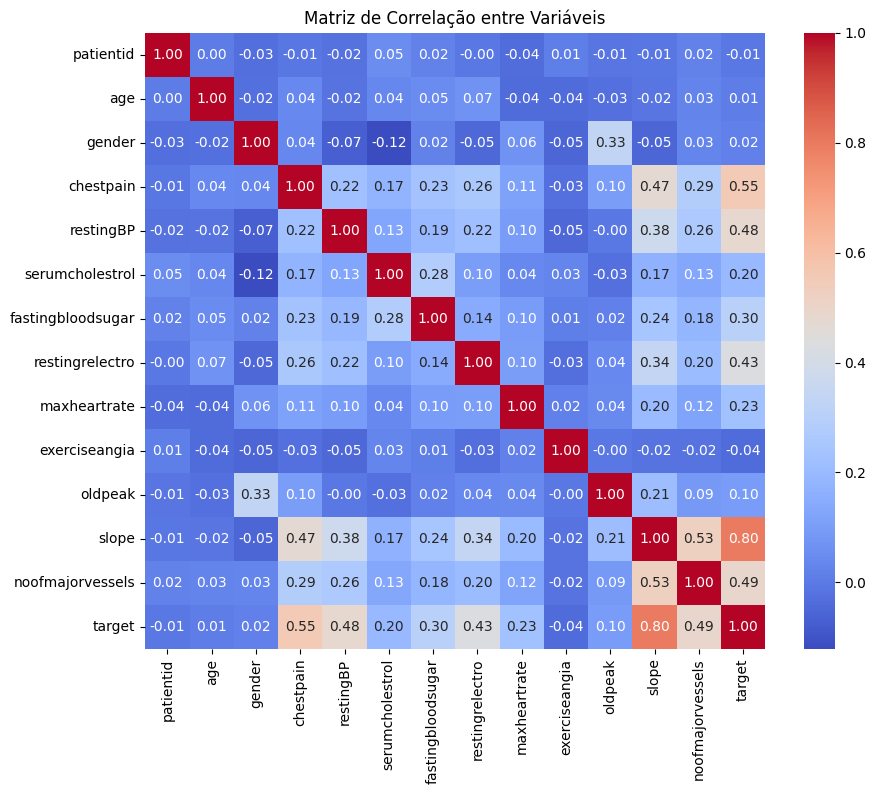

In [12]:
correlation_matrix = dados.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

# Modelando

In [13]:
x = dados.drop(columns = ['target', 'patientid'], axis=1)
y = dados['target']

In [14]:
from sklearn.model_selection import train_test_split

x_teste, x_treino, y_teste, y_treino = train_test_split(x, y, random_state = 16, test_size = 0.3)

In [15]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

## RandomForestClassifier

In [16]:
RForest = RandomForestClassifier()

In [17]:
RForest.fit(x_treino, y_treino)

RandomForestClassifier()

In [18]:
RForest.predict(x_teste)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [20]:
RForest_parametros_busca = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20],
    'max_features' : ['sqrt', 'log2']
}

In [21]:
RForest_grid_search = GridSearchCV(estimator=RForest, param_grid=RForest_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [22]:
RForest_grid_search.fit(x_treino, y_treino)


GridSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 150, 500]},
             scoring='accuracy')

In [23]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {RForest_grid_search.best_params_}')
print(f'A melhor score foi de: {RForest_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
A melhor score foi de: 0.98


In [24]:
RForest = RandomForestClassifier(**RForest_grid_search.best_params_)
RForest.fit(x_treino, y_treino)
RForest.predict(x_teste)
RForest.score(x_teste, y_teste)

0.9542857142857143

## BernoulliNB

In [25]:
Bernoulli = BernoulliNB()

In [26]:
Bernoulli.fit(x_treino, y_treino)

BernoulliNB()

In [27]:
Bernoulli.predict(x_teste)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [28]:
Bernoulli_parametros_busca = {
    'alpha': [0.0, 0.1, 0.5, 1.0],
    'binarize': [None, 0.0, 0.5, 1.0]
}

In [29]:
Bernoulli_grid_search = GridSearchCV(estimator=Bernoulli, param_grid=Bernoulli_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [30]:
Bernoulli_grid_search.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


GridSearchCV(cv=15, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.0, 0.1, 0.5, 1.0],
                         'binarize': [None, 0.0, 0.5, 1.0]},
             scoring='accuracy')

In [31]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {Bernoulli_grid_search.best_params_}')
print(f'A melhor score foi de: {RForest_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'alpha': 0.0, 'binarize': 1.0}
A melhor score foi de: 0.98


In [32]:
Bernoulli = BernoulliNB(**Bernoulli_grid_search.best_params_)
Bernoulli.fit(x_treino, y_treino)
Bernoulli.predict(x_teste)
Bernoulli.score(x_teste, y_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.9371428571428572

## GaussianNB

In [33]:
Gaussian = GaussianNB()

In [34]:
Gaussian.fit(x_treino, y_treino)

GaussianNB()

In [35]:
Gaussian.predict(x_teste)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [36]:
Gaussian_parametros_busca = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [37]:
Gaussian_grid_search = GridSearchCV(estimator=Gaussian, param_grid=Gaussian_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [38]:
Gaussian_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=15, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [39]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {Gaussian_grid_search.best_params_}')
print(f'A melhor score foi de: {Gaussian_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'var_smoothing': 1e-06}
A melhor score foi de: 0.9533333333333333


In [40]:
Gaussian = GaussianNB(**Gaussian_grid_search.best_params_)
Gaussian.fit(x_treino, y_treino)
Gaussian.predict(x_teste)
Gaussian.score(x_teste, y_teste)

0.9371428571428572

## DecisionTreeClassifier

In [41]:
Decision_Tree = DecisionTreeClassifier()

In [42]:
Decision_Tree.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [43]:
Decision_Tree.predict(x_teste)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [44]:
Decision_Tree_parametros_busca = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
}

In [45]:
Decision_Tree_grid_search = GridSearchCV(estimator=Decision_Tree, param_grid=Decision_Tree_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [46]:
Decision_Tree_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {Decision_Tree_grid_search.best_params_}')
print(f'A melhor score foi de: {Decision_Tree_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'criterion': 'entropy', 'max_depth': 28, 'splitter': 'best'}
A melhor score foi de: 0.9700000000000001


In [48]:
DecisionTree = DecisionTreeClassifier(**Decision_Tree_grid_search.best_params_)
DecisionTree.fit(x_treino, y_treino)
DecisionTree.predict(x_teste)
DecisionTree.score(x_teste, y_teste)

0.9371428571428572

## KNN

In [49]:
KNN = KNeighborsClassifier(metric='euclidean')

In [50]:
KNN.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [51]:
KNN.predict(x_teste)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [52]:
KNN_parametros_busca = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [53]:
KNN_grid_search = GridSearchCV(estimator=KNN, param_grid=KNN_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [54]:
KNN_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(metric='euclidean'),
             n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [55]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {KNN_grid_search.best_params_}')
print(f'A melhor score foi de: {KNN_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
A melhor score foi de: 0.7933333333333332


In [56]:
KNN = KNeighborsClassifier(**KNN_grid_search.best_params_)
KNN.fit(x_treino, y_treino)
KNN.predict(x_teste)
KNN.score(x_teste, y_teste)

0.8242857142857143

## LogisticRegression

In [57]:
Logistic = LogisticRegression()

In [58]:
Logistic.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
Logistic.predict(x_teste)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

In [60]:
Logistic_parametros_busca = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [61]:
Logistic_grid_search = GridSearchCV(estimator=Logistic, param_grid=Logistic_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [62]:
Logistic_grid_search.fit(x_treino, y_treino)


GridSearchCV(cv=15, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [63]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {Logistic_grid_search.best_params_}')
print(f'A melhor score foi de: {Logistic_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'C': 1.0, 'class_weight': 'balanced', 'solver': 'newton-cg'}
A melhor score foi de: 0.9666666666666667


In [64]:
Logistic = LogisticRegression(**Logistic_grid_search.best_params_)
Logistic.fit(x_treino, y_treino)
Logistic.predict(x_teste)
Logistic.score(x_teste, y_teste)

0.9557142857142857

## SVC

In [65]:
from sklearn.svm import SVC
SVC = SVC()

In [66]:
SVC.fit(x_treino, y_treino)

SVC()

In [67]:
SVC.predict(x_teste)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [68]:
SVC_parametros_busca = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

In [69]:
SVC_grid_search = GridSearchCV(estimator=SVC, param_grid=SVC_parametros_busca,
                           scoring='accuracy', cv=15, n_jobs=-1)

In [70]:
SVC_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=15, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
             scoring='accuracy')

In [71]:
print(f'Os melhores parâmetros selecionados dentro da nossa lista foram: {SVC_grid_search.best_params_}')
print(f'A melhor score foi de: {SVC_grid_search.best_score_}')

Os melhores parâmetros selecionados dentro da nossa lista foram: {'C': 1.0, 'gamma': 0.001}
A melhor score foi de: 0.7666666666666667


In [76]:
from sklearn.svm import SVC
svc = SVC(**SVC_grid_search.best_params_)
svc.fit(x_treino, y_treino)
svc.predict(x_teste)
svc.score(x_teste, y_teste)

0.82

# Resultados


In [77]:
modelos = [RForest, Logistic, svc, DecisionTree, KNN, Gaussian, Bernoulli]
pontuacoes = []
for modelo in modelos:
    pontuacao = modelo.score(x_teste, y_teste)
    pontuacoes.append(pontuacao)

resultados = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB','BernoulliNB'],
    'Score' : pontuacoes
})

In [78]:
resultados

,Algorithm,Score
0,RandomForestClassifier,0.954286
1,LogisticRegression,0.955714
2,SVC,0.820000
3,DecisionTreeClassifier,0.937143
4,KNeighborsClassifier,0.824286
5,GaussianNB,0.937143
6,BernoulliNB,0.937143
